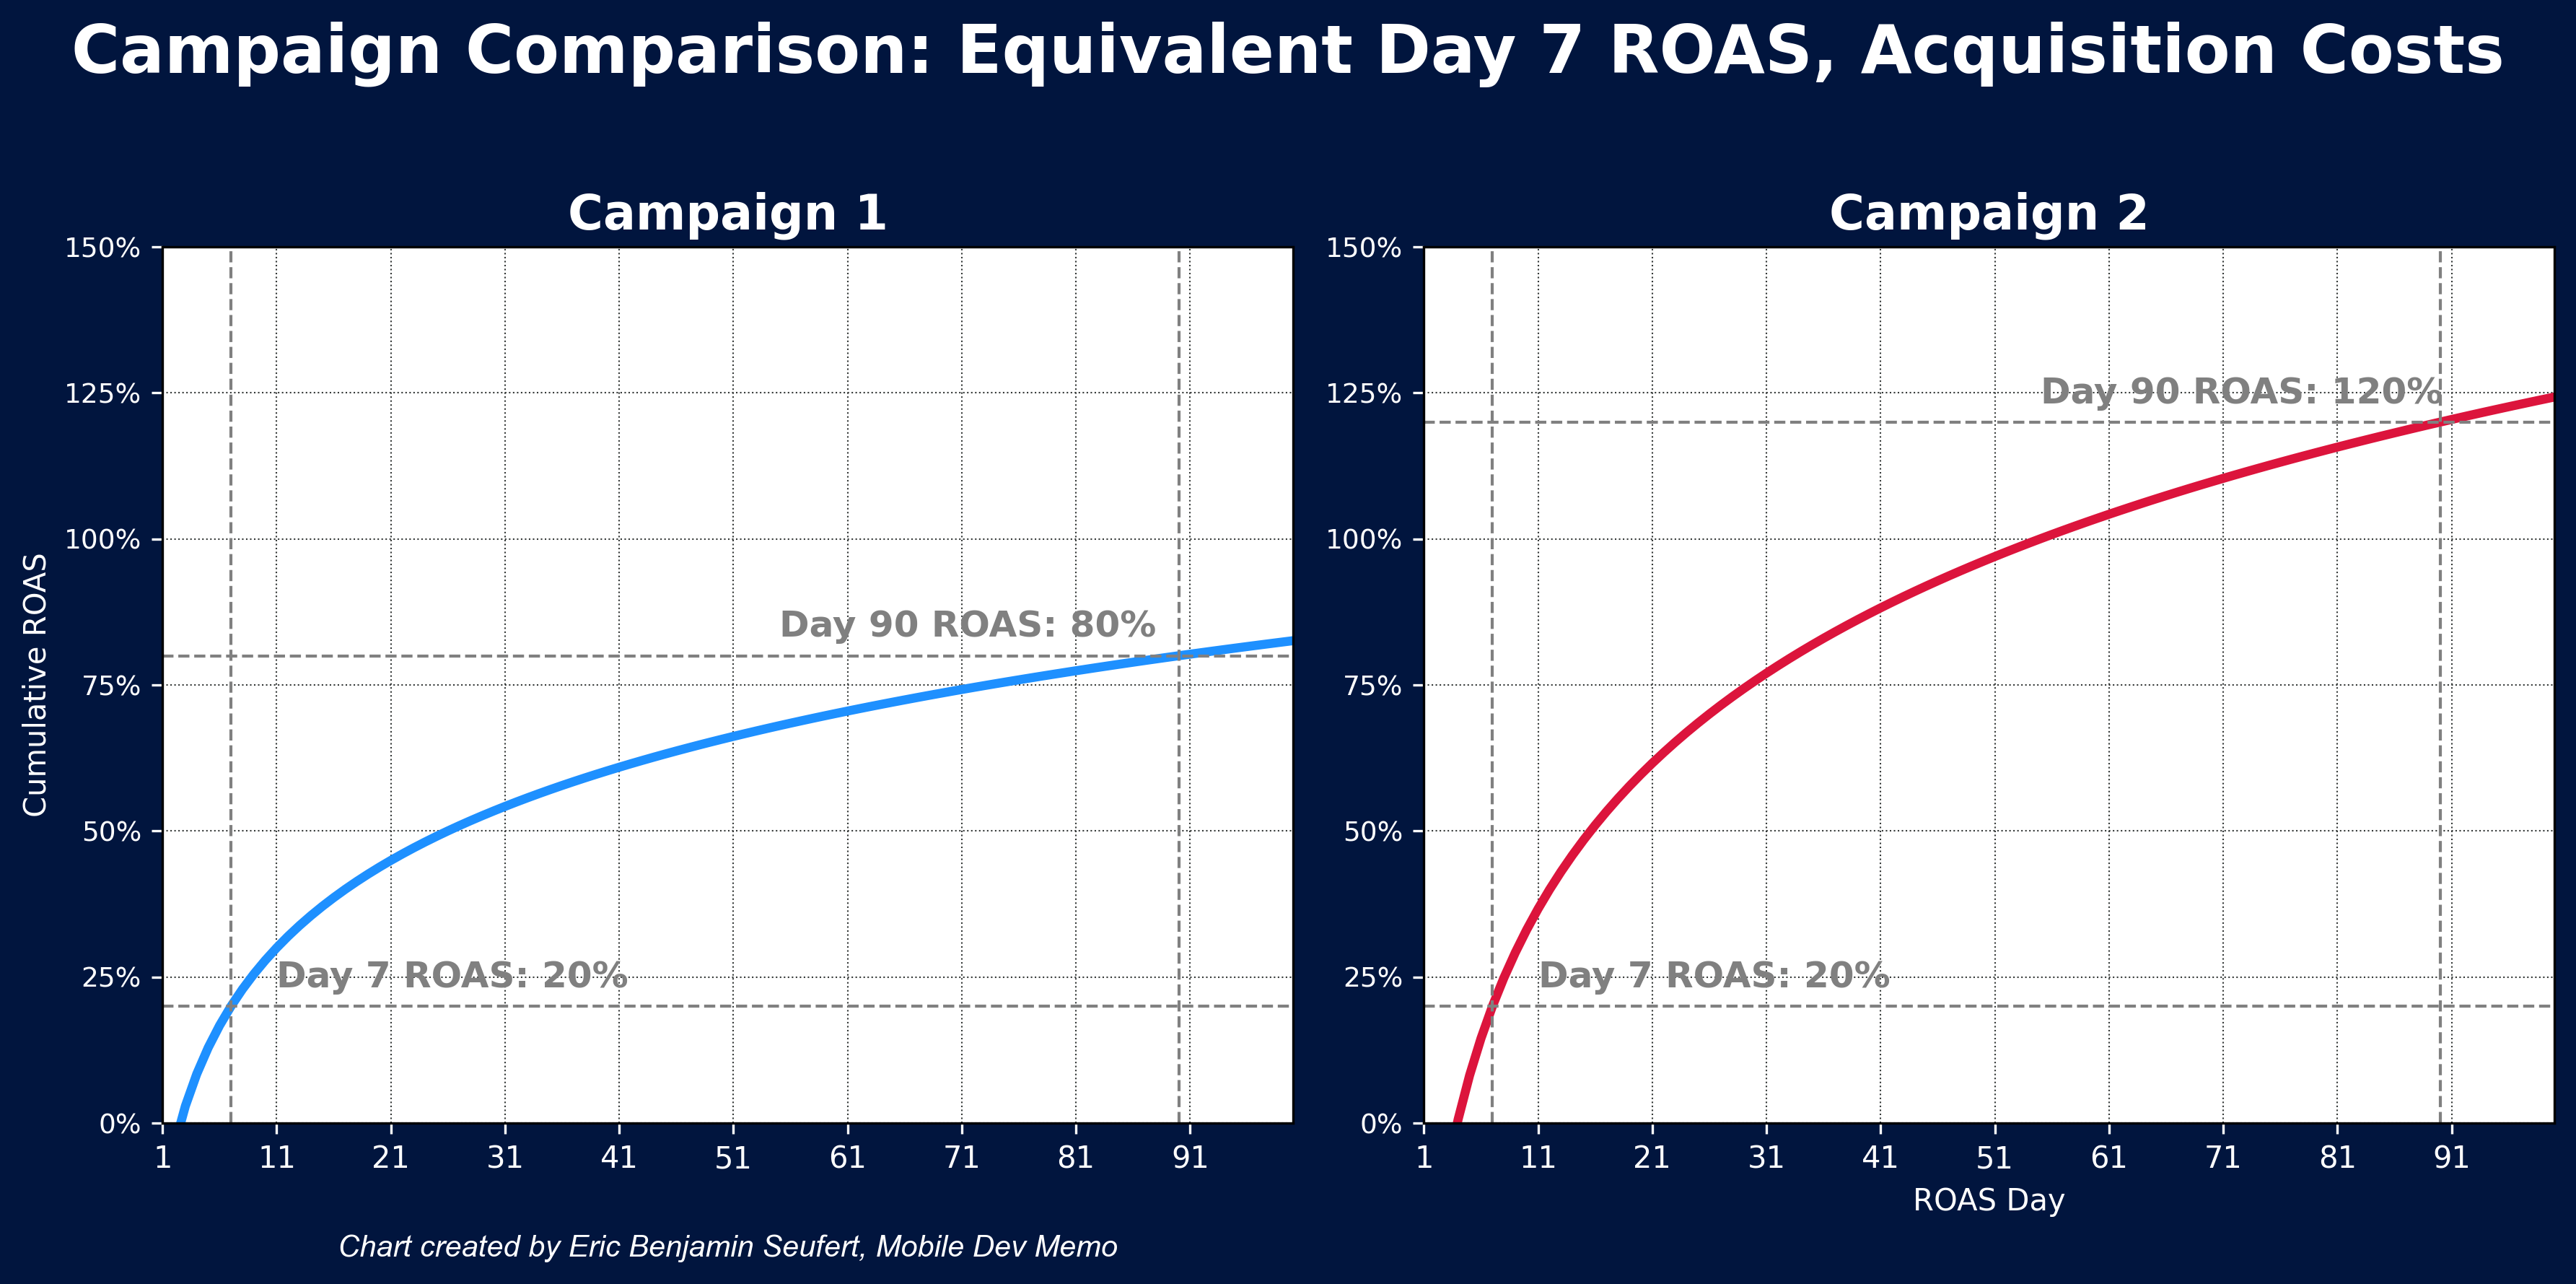

In [1]:
import matplotlib.pyplot as plt
import numpy as np

chart_annotation_font = {
  'family': 'arial',
  'color':  'black',
  'weight': 'normal',
  'size': 10,
  'style': 'italic'
}

# Parameters
params = {'width': 10, 'height': 6}
days = np.arange(1, 101)  # Day 1 to Day 100

# Targets
target_day7 = 20   # 20% ROAS on Day 7
target_left_day90 = 80
target_right_day90 = 120

# Function to solve A and B in A*log(d+1) + B = ROAS
def get_log_coefficients(day7_target, day90_target):
    x1 = np.log(8)
    x2 = np.log(91)
    y1 = day7_target
    y2 = day90_target
    A = (y2 - y1) / (x2 - x1)
    B = y1 - A * x1
    return A, B

# Compute coefficients
A_left, B_left = get_log_coefficients(target_day7, target_left_day90)
A_right, B_right = get_log_coefficients(target_day7, target_right_day90)

# Curves
left_roas = A_left * np.log(days + 1) + B_left
right_roas = A_right * np.log(days + 1) + B_right

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=300, figsize=(12, 6))
fig.patch.set_facecolor('xkcd:navy')
fig.suptitle('Campaign Comparison: Equivalent Day 7 ROAS, Acquisition Spend', size=22, weight="bold", color="white", x=0.5)

for ax in (ax1, ax2):
    ax.set_facecolor('xkcd:white')
    ax.grid(True, which='both', color='xkcd:charcoal', linewidth=0.5, linestyle=':')
    ax.tick_params(colors='white')
    ax.set_xlim(1, 100)
    ax.set_xticks(np.arange(1, 101, 10))
    ax.set_xticklabels([str(i) for i in range(1, 101, 10)], fontsize=10)
    ax.set_xlabel("ROAS Day", color='white')

# Left chart
ax1.plot(days, left_roas, color='dodgerblue', linewidth=3)
ax1.set_ylabel("Cumulative ROAS", fontsize=10, color='white')
ax1.set_ylim(0, 150)
ax1.set_yticks(np.arange(0, 151, 25))
ax1.set_yticklabels([f"{i}%" for i in range(0, 151, 25)], fontsize=9)

# Right chart
ax2.plot(days, right_roas, color='crimson', linewidth=3)
ax2.set_ylim(0, 150)
ax2.set_yticks(np.arange(0, 151, 25))
ax2.set_yticklabels([f"{i}%" for i in range(0, 151, 25)], fontsize=9)

# Mark Day 7
day7 = 7
left_val_7 = left_roas[day7 - 1]
right_val_7 = right_roas[day7 - 1]

ax1.axvline(x=day7, color='gray', linestyle='--', linewidth=1)
ax1.axhline(y=left_val_7, color='gray', linestyle='--', linewidth=1)
ax2.axvline(x=day7, color='gray', linestyle='--', linewidth=1)
ax2.axhline(y=right_val_7, color='gray', linestyle='--', linewidth=1)

ax1.text(day7 + 4, left_val_7 + 2, f"Day 7 ROAS: {left_val_7:.0f}%", 
         color='gray', fontsize=12, fontweight='bold', va='bottom')
ax2.text(day7 + 4, right_val_7 + 2, f"Day 7 ROAS: {right_val_7:.0f}%", 
         color='gray', fontsize=12, fontweight='bold', va='bottom')

# Mark Day 90
day90 = 90
left_val_90 = left_roas[day90 - 1]
right_val_90 = right_roas[day90 - 1]

ax1.axvline(x=day90, color='gray', linestyle='--', linewidth=1)
ax1.axhline(y=left_val_90, color='gray', linestyle='--', linewidth=1)
ax2.axvline(x=day90, color='gray', linestyle='--', linewidth=1)
ax2.axhline(y=right_val_90, color='gray', linestyle='--', linewidth=1)

ax1.text(day90 - 35, left_val_90 + 2,
         f"Day 90 ROAS: {left_val_90:.0f}%", color='gray', fontweight='bold', fontsize=12, va='bottom')
ax2.text(day90 - 35, right_val_90 + 2,
         f"Day 90 ROAS: {right_val_90:.0f}%", color='gray', fontweight='bold', fontsize=12, va='bottom')

ax1.set_title("Campaign 1", fontsize=16, weight='bold', color='white')
ax2.set_title("Campaign 2", fontsize=16, weight='bold', color='white')

ax1.set_xlabel(
    "Chart created by Eric Benjamin Seufert, Mobile Dev Memo",
    fontdict=chart_annotation_font,
    labelpad=20,
    color="white"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
